# TAREA 2 : Grupo 8 (**Javier Muñoz de Torres y Álvaro Morán Lorente**)<br>


**Datos**: Trabajaremos con un conjunto de datos del ambito de medicina/salud, concretamente en relación a problemas al corazón. Los datos vienen de la unión de otros 4 datasets procedentes de Cleveland; Hungary; Switzerland y VA Long Beach, y han sido tomados de pacientes de hospitales.

**Base de datos**: [Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease)<br>
En el conjunto de datos el target `num` es categórica, por lo que nos centraremos en una tarea de clasificación. Tiene un rango (0,4), es decir, 5 posibles niveles, que indican de menor a mayor la presencia de un problema en el corazon. El objetivo de este análisis es clasificar los pacientes, dados los atributos que mostraremos a continuación, según "la presencia de problemas" de corazon, lo que se puede interpretar con "como de probable es que tengas un problema de corazón".

**Interpretación del target:** <br>
Para darle un significado a ese rango (0,4), diremos que:<br>
`0` &rarr; Poco probable<br>
`1` &rarr; Algo probable<br>
`2` &rarr; Probable<br>
`3` &rarr; Bastante probable<br>
`4` &rarr; Muy probable<br>
Para nuestro análisis binarizaremos la variable objetivo (**`target`**). Asignaremos como clase positiva `1` aquellos diagnósticos en los que el estrechamiento de arterias es superior al 50% (problemas graves de corazón) y le asignaremos la clase negativa `0` a aquellos casos en los que el estrechamiento de arterias sea inferior al 50% (ausencia de problemas de corazón).
A continuación, analizaremos los atributos (features):

## Sección I. Esquema lineal (SVM)

Cargamos todas las librerias que vamos a utilizar a lo largo de la tarea.

In [94]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

En esta primera sección vamos a hacer uso del modelo Support Vector Machine (SVM) considerando todas las características presentes en el dataset.

In [25]:
# Cargamos los dataframes preprocesados en la tarea 1
X_Diseño_preprocesado = pd.read_pickle('X_Diseño_preprocesado.pkl')
X_test_preprocesado = pd.read_pickle('X_test_preprocesado.pkl')
Y_Diseño = pd.read_pickle('Y_Diseño.pkl')
Y_test = pd.read_pickle('Y_test.pkl')
X_Diseño_preprocesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          212 non-null    float64
 1   sex          212 non-null    float64
 2   trestbps     212 non-null    float64
 3   chol         212 non-null    float64
 4   fbs          212 non-null    float64
 5   thalach      212 non-null    float64
 6   exang        212 non-null    float64
 7   oldpeak      212 non-null    float64
 8   ca           212 non-null    float64
 9   cp_1.0       212 non-null    float64
 10  cp_2.0       212 non-null    float64
 11  cp_3.0       212 non-null    float64
 12  cp_4.0       212 non-null    float64
 13  restecg_0.0  212 non-null    float64
 14  restecg_1.0  212 non-null    float64
 15  restecg_2.0  212 non-null    float64
 16  slope_1.0    212 non-null    float64
 17  slope_2.0    212 non-null    float64
 18  slope_3.0    212 non-null    float64
 19  thal_3.0

In [26]:
svm_lineal = SVC(kernel = 'linear')
svm_lineal.fit(X_Diseño_preprocesado, Y_Diseño)
coeff_svm_lineal = list(map(float,svm_lineal.coef_[0]))
pairs = []
for i in range(len(coeff_svm_lineal)):
    pairs.append([coeff_svm_lineal[i],X_Diseño_preprocesado.columns[i]])
pd.DataFrame(pairs, columns=['Coeff', 'Feature'])

,Coeff,Feature
0,-0.163647,age
1,0.221199,sex
2,0.227613,trestbps
3,-0.100452,chol
4,-0.125688,fbs
5,0.000031,thalach
6,0.378430,exang
7,0.279256,oldpeak
8,0.801964,ca
9,-0.622205,cp_1.0


Se puede observar que los coeficientes que mas influyen en el target a la hora de clasificar son: <br>
* **Positivamente a la clase 1:**  <br>
    `1` ca : Número de vasos principales (0-3) coloreados por fluoroscopia <br>
    `2` cp_4.0 : Tipo de dolor en el pecho (Asintomático) <br>
    `3` thal_7.0 : Prueba de tálamo o tali (Efecto reversble) <br>
* **Positivamente a la clase 0:**  <br>
    `1` cp_1.0 : Tipo de dolor en el pecho (Angina típica) <br>
    `2` thal_3.0 Prueba de tálamo o tali (Efecto fijo) : <br>
    `3` slope_1.0 : La pendiente del segmento ST en el pico del ejercicio (Pendiente ascendente) <br>

 Coeficientes SVM lineal ?¿?¿??
?¿¿¿¿¿¿¿¿¿¿¿¿¿¿¿¿¿¿?¿??

### Importancia del escalado de los datos


La normalizacion/estandarización de los datos para crear un modelo SVM es esencial. Esto se debe a que el modelo de SVM utiliza muestras del entrenamiento que llamaremos 'vectores soporte' para crear la frontera que  separa linealmente las clases y maximiza la distancia a estos puntos. Como hace uso de la distancia euclidea necesitamos estandarizar los datos para trabajar con las misma escala.

### Comparacion con la regresión logística

In [27]:
coeff_reg_log = [-0.11519437219116264,
 0.566141608117244, 
 0.3099489241956889, 
 -0.012310801030252373,
 -0.2759661876682957, 
 -0.04660442981566006,
 0.6435409647784468, 
 0.5140459080033545, 
 1.1380068486464945, 
 -0.9828262177706325, 
 0.15509087190068083, 
 -0.581341375932084, 
 1.2202274133609519, 
 -0.3561452457617638, 
 -0.012267781149770146,
 0.17956371847045208, 
 -0.5633388805305239, 
 0.5956251051994648, 
 -0.22113553311002293,
 -0.6966608521082523, 
 -0.17539205144422487,
 0.6832035951113941]
# Creamos el dataframe de comparacion
coeff_comparacion = pd.DataFrame([coeff_reg_log], columns=X_Diseño_preprocesado.columns)
coeff_comparacion.loc[len(coeff_comparacion)] = coeff_svm_lineal
coeff_comparacion.loc[len(coeff_comparacion)] = abs(coeff_comparacion.iloc[0] - coeff_comparacion.iloc[1])
coeff_comparacion = coeff_comparacion.T
coeff_comparacion.columns = ['Coef_Regresion','Coef_SVM_lineal','Diferencia']
coeff_comparacion


,Coef_Regresion,Coef_SVM_lineal,Diferencia
age,-0.115194,-0.163647,0.048453
sex,0.566142,0.221199,0.344942
trestbps,0.309949,0.227613,0.082336
chol,-0.012311,-0.100452,0.088141
fbs,-0.275966,-0.125688,0.150278
thalach,-0.046604,0.000031,0.046636
exang,0.643541,0.378430,0.265111
oldpeak,0.514046,0.279256,0.234790
ca,1.138007,0.801964,0.336043
cp_1.0,-0.982826,-0.622205,0.360621


La svm en aproximadamente la mitad de los coeficientes apenas difiere con la regresión logística. En cuanto a los coeficientes más grandes, ambos modelos concuerdan en que los atributos más influyentes son:

* **Positivamente a la clase 1:**  <br>
     - thal_0.7  <br>
     - cp_4.0  <br>
     - ca  <br>
* **Positivamente a la clase 0:**  <br>
     - cp_1.0 <br>
     - thal_3.0 <br>

En la mayoría de coeficientes, ambos modelos, puesto que son similares, han llegado una conclusión similar. Algunas característica que parecía relevante con 1 modelo ha acabado siendo descartada como influyente, como por ejemplo slope_1.0, oldpeak o exang. Por otro lado, ambos modelos coinciden a la hora de poner coeficientes muy bajos a ciertos atributos, como restecg_1.0, cp_2.0, thalach o chol.

### Prestaciones de los modelos


Ahora vamos a ver las prestaciones de ambos modelos para comparar los resultados y extraer conclusiones.

In [28]:
# Regresión logística
modelo_RL = LogisticRegression(C=0.001, solver='newton-cg', penalty=None, random_state=314)
modelo_RL.fit(X_Diseño_preprocesado, Y_Diseño)
modelo_RL_predict = modelo_RL.predict(X_test_preprocesado)

# SVM 
svm_lineal_predict = svm_lineal.predict(X_test_preprocesado)
dif = (modelo_RL_predict!=svm_lineal_predict).sum()
print(f"Numero predicciones distintas: {dif}")
print(f"Numero de observaciones: {X_test_preprocesado.shape[0]}")

Numero predicciones distintas: 1
Numero de observaciones: 91


Ambos modelos han predecido tan solo una observación distinta de 91 que hay en el conjunto de test, es decir, que sus prestaciones son practicamente idénticas. Ahora, comparemos directamente con las figuras de mérito.

In [29]:
#Obtenemos las figuras de merito
f1_lineal = f1_score(Y_test,svm_lineal_predict)
acc_lineal = accuracy_score(Y_test,svm_lineal_predict)
prec_lineal = precision_score(Y_test,svm_lineal_predict)
recall_lineal = recall_score(Y_test,svm_lineal_predict)

In [30]:
figuras_regresion_log = {
'RegresionLogistica_reg':     [0.846154,	0.815789,	0.861111,	0.775],
'SVM Lineal': [acc_lineal,f1_lineal,prec_lineal,recall_lineal]
}
tabla_regresion_log = pd.DataFrame(figuras_regresion_log, index=['Accuracy', 'F1_score', 'Precisión', 'Recall'])
tabla_regresion_log

,RegresionLogistica_reg,SVM Lineal
Accuracy,0.846154,0.835165
F1_score,0.815789,0.805195
Precisión,0.861111,0.837838
Recall,0.775000,0.775000


Tras calcular las figuras de mérito observamos que ambos modelos presentan unos resultados similares. Esto tiene sentido si tenemos en cuenta que ambos modelos tienen en comun 5 atributos como los mas relevantes/influyentes.

## Sección II. Esquema no lineal 

Las prestanciones del esquema lineal no son malas, pero no lo suficiente buenas como para asumir que es un problema linealmente separable por lo que probaremos otros 3 kernels, pero sin ajustar sus hiperparámetros todavía.

In [31]:
# Creamos el conjunto de train y validacion
X_train,X_val,Y_train ,Y_val= train_test_split(X_Diseño_preprocesado,Y_Diseño,random_state=314)

In [62]:
# Creamos los diferentes modelos con distintos kernel
kernels = ['linear', 'rbf', 'poly','sigmoid']
figuras_merito = {}

for kernel in kernels:
    #Creamos el modelo y predecimos
    svm_no_lineal = SVC(kernel = kernel,random_state=314)
    svm_no_lineal.fit(X_train,Y_train)
    prediccion = svm_no_lineal.predict(X_val)
    #Hallamos las figuras de meéito
    f1_kernel = f1_score(Y_val, prediccion)
    acc_kernel = accuracy_score(Y_val, prediccion)
    prec_kernel = precision_score(Y_val, prediccion)
    recall_kernel = recall_score(Y_val, prediccion)
    #Las guardamos en un diccionario
    figuras_merito[kernel] = {}
    figuras_merito[kernel]['f1_score'] = f1_kernel
    figuras_merito[kernel]['accuracy'] = acc_kernel
    figuras_merito[kernel]['precision'] = prec_kernel
    figuras_merito[kernel]['recall'] = recall_kernel    


In [63]:
df_figuras = pd.DataFrame(figuras_merito)
df_figuras

,linear,rbf,poly,sigmoid
f1_score,0.809524,0.844444,0.800000,0.818182
accuracy,0.849057,0.867925,0.849057,0.849057
precision,0.850000,0.826087,0.888889,0.818182
recall,0.772727,0.863636,0.727273,0.818182


Utilizando los kernel no lineales observamos mejores que con el kernel lineal. El que produce mejores resultados es la **rbf**.   

Ahora vamos a ver como varía el *recall* en función de los hiperparámetros del *kernel* con mejores prestaciones.

In [66]:
hp_linear = {'C': [10,1,0.1]}
hp_rbf = {'C': [10,1,0.1],'gamma': [0.01, 0.1, 1, 10]}
hp_poly = {'C': [10,1,0.1],'degree': [2,3,4],'gamma':  [0.01, 0.1, 1, 10]}
hp_sigmoid = {'C': [10,1,0.1],'gamma': [0.01, 0.1, 1, 10]}
hiperparametros_kernels = []
hiperparametros_kernels.append(hp_linear)
hiperparametros_kernels.append(hp_rbf)
hiperparametros_kernels.append(hp_poly)
hiperparametros_kernels.append(hp_sigmoid)

In [77]:
# Busqueda de hiperparmáetros
resultados = {}
i = 0
while i < len(hiperparametros_kernels):
    SVM_cv = GridSearchCV(SVC(kernel=kernels[i],random_state=314),param_grid=hiperparametros_kernels[i],cv=10,scoring='recall',return_train_score=True)
    SVM_cv.fit(X_Diseño_preprocesado,Y_Diseño)
    resultados[kernels[i]] = SVM_cv.cv_results_
    print(f"Finished {kernels[i]}")
    i += 1

Finished linear
Finished rbf
Finished poly
Finished sigmoid


In [93]:
#Obtenemos los resultados de cada kernel
linear = pd.DataFrame(resultados['linear'])
poly = pd.DataFrame(resultados['poly'])
rbf = pd.DataFrame(resultados['rbf'])
sigmoid = pd.DataFrame(resultados['sigmoid'])



In [120]:
recall_scores


array([0.82777778, 0.81      , 0.21111111, 0.        , 0.75777778,
       0.79777778, 0.13111111, 0.        , 0.46555556, 0.76777778,
       0.        , 0.        ])

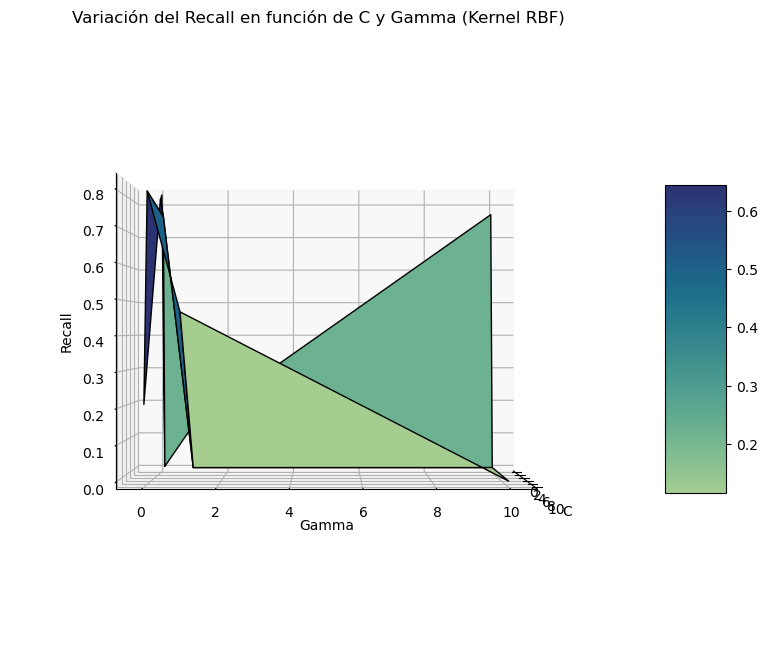

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extraer los resultados del GridSearchCV para el kernel RBF
kernel_rbf_results = resultados['rbf']  # Ajusta si la clave en tu diccionario es diferente

# Extraer los valores de los hiperparámetros y el score
C_values = kernel_rbf_results['param_C'].data  # Valores de C
gamma_values = kernel_rbf_results['param_gamma'].data  # Valores de gamma
recall_scores = kernel_rbf_results['mean_test_score']  # Recall medio

# Asegurarse de convertir todo a arrays NumPy para trabajar más fácilmente
C_values = np.array(C_values, dtype=float)
gamma_values = np.array(gamma_values, dtype=float)
recall_scores = np.array(recall_scores, dtype=float)

# Crear una malla de C y gamma para el gráfico 3D
C_unique = np.unique(C_values)
gamma_unique = np.unique(gamma_values)

# Reorganizar el score (recall) en formato de malla
C_grid, gamma_grid = np.meshgrid(C_unique, gamma_unique)

# Reshape del score para que coincida con la malla
recall_grid = recall_scores.reshape(len(gamma_unique), len(C_unique))

# Crear el gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar la superficie
surf = ax.plot_surface(C_grid, gamma_grid, recall_grid, cmap='crest', edgecolor='k')

ax.view_init(elev=0, azim=0)  # PARA ROTAR!!!

# Etiquetas de los ejes
ax.set_xlabel('C')
ax.set_ylabel('Gamma')
ax.set_zlabel('Recall')
ax.set_title('Variación del Recall en función de C y Gamma (Kernel RBF)')

# Barra de colores para el score
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Mostrar el gráfico
plt.show()


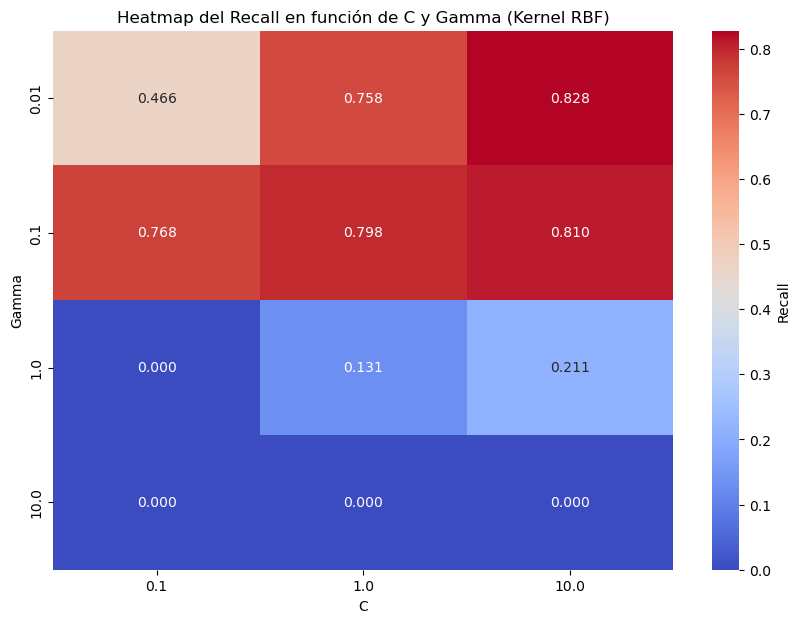

In [181]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Extraer resultados del GridSearchCV
kernel_rbf_results = resultados['rbf']  # Asegúrate de que es el kernel correcto

# Extraer los valores de C, gamma y el score
C_values = kernel_rbf_results['param_C'].data
gamma_values = kernel_rbf_results['param_gamma'].data
recall_scores = kernel_rbf_results['mean_test_score']

# Crear un DataFrame para facilitar el manejo de datos
df = pd.DataFrame({
    'C': C_values,
    'Gamma': gamma_values,
    'Recall': recall_scores
})

# Crear una tabla pivotante para el heatmap
pivot_table = df.pivot_table(index='Gamma', columns='C', values='Recall')

# Dibujar el heatmap con Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".3f", cbar_kws={'label': 'Recall'}) # PRUEBA: coolwarm , YlOrRd , crest
plt.title('Heatmap del Recall en función de C y Gamma (Kernel RBF)')
plt.xlabel('C')
plt.ylabel('Gamma')
plt.show()

In [183]:
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_dark"

# Crear gráfico interactivo
fig = go.Figure(data=[go.Surface(z=recall_grid, x=C_unique, y=gamma_unique, colorscale='Inferno')]) #Prueba con Inferno, Magma y Jet

# Etiquetas
fig.update_layout(
    title='Recall en función de C y Gamma',
    scene=dict(
        xaxis_title='C',
        yaxis_title='Gamma',
        zaxis_title='Recall'
    )
)

fig.show()

In [157]:
import plotly.express as px
import pandas as pd

# Crear DataFrame
df_plotly = pd.DataFrame({
    'C': C_values,
    'Gamma': gamma_values,
    'Recall': recall_scores
})

# Gráfico Scatter 3D interactivo
fig = px.scatter_3d(df_plotly, x='C', y='Gamma', z='Recall', color='Recall', title='Recall en función de C y Gamma', color_continuous_scale='Jet')
fig.show()